# Integración numérica.
## Definición de la integral en dos dimensiones.
En métodos numericos, una integral definida por dos límites (a,b) de una funcion $f(x)$, comprende el área que esta encierra con respecto al eje $x$.

Analíticamente una integral definida se expresa como:
$$
\int_a^b {f(x)}\;dx\;=\;\lim_{n \to \infty}{\sum_{k=1}^{n} \left({a + k\cdot\frac{b-a}{n}}\right)}
$$

A esto se le conoce como la definición de la integral a partir de una suma de Riemann.

Pero, a partir del objetivo de este curso, se aproximará este resultado a un valor numerico, basado en valores finitos dentro de los limites de la sumatoria previamente presentada.

El método más conocido, es que que aproxima la integral a partir de una sumatoria de rectángulos consecutivos. quedando la formula de la siguiente forma:

$$
\int_a^b {f(x)}\;dx\;=\;{\sum_{k=1}^{n} \left({a + k\cdot\frac{b-a}{n}}\right)}
$$

Y se puede representar gráficamente de la siguiente forma:

<img src="images/integral_normal.png" alt="Imagen">

Pero no se hará uso de este debido a que existen metodos que cometen un menor error al calcular el valor de la misma.

## Método del trapecio para integrales simples.

Este método numérico aproxima el valor de la integral a partir de sumas finitas de trapecios consecutivos generados a partir de los valores de la funcion evaluados en dos puntos especificos del intervalo dado.

### Método numérico.

Para poder generar dichos trapecios haremos uso de un paso $h$ que dividirá el intervalo $[a,b]$ en $n$ particiones iguales; por lo que el valor de este paso estará dado por:

$$h = \frac{b-a}{n}$$

Por lo que se tomarán nodos en x obtenidos por:

$$x_{j} = a+(j-1)\cdot h \;\;\;\; \forall j = 1,2,3,...,n+1$$

Para el cálculo de toda el área bajo la curva, se deberá tomar en cuenta el valor del área de los trapecios generados, dada por:

$$A = h\cdot \frac{f(x_j+x_{j+1})}{2}$$
<img src="images/trapecio.gif" alt="Imagen">

Y se sumarán finitamente, tantas veces, cono $n$ trapecios tengamos, generalizando la siguiente formula para su cálculo:

$$\int_{a}^{b} {f(x)}\;dx = \sum_{j=1}^{n} {\left[h\cdot\left(\frac{f(a+(j-1)\cdot h)+f(a+j\cdot h)}{2}\right)\right]} = I*$$

Y gráficamente representado por:

<img src="images/integral_trapecios.jpg" alt="Imagen" style = "width:40%;">

### Error del método

Como todo método numérico, al aproximar valores, se cometen errores con respecto a los valores reales. En el caso del método del trapecio para la aproximación de una integral simple, se comete un error que viene dado por:

$$\left|I - I*\right| \leq \frac{b-a}{12}\cdot\left|{max(f^2(x))\cdot h^2}\right|$$

### Manual de uso del programa
#### Entradas

El programa recibirá 4 parámetros ingrados por el usuario:

- $f(x)$: Recibe una función en formato númerico aceptado por python; está debe de estar simplemente en funcion de x.
- a: El límite inferior de la integral.
- b: El límite superior de la integral.
- n: Cantidad de trapecios a considerar.

#### Salidas
- I: El valor númerico que toma la integral de la función ingresada en el intervalo dado.
- Gráfico de los trapecios formados por la integral.

In [1]:
from sympy import *
from sympy import diff as Diff
from sympy import Abs as Abso
from numpy import *
import ipywidgets as widgets
from IPython.display import display, Math, Latex
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
x = Symbol('x')
init_printing()
f_input = widgets.Text(
    placeholder='Funciona integrar',
    description='Funcion:',
    disabled=False
)

a_input = widgets.FloatText(
    value=0,
    description='Límite Inferior:',
    disabled=False
)

b_input = widgets.FloatText(
    value=1,
    description='Límite Superior:',
    disabled=False
)

n_input = widgets.BoundedIntText(
    min = 1,
    step = 1,
    value=2,
    description='n:',
    disabled=False
)

display(f_input)
display(Math('---------------------------------------------------------------'))
display(a_input, b_input)
display(Math('---------------------------------------------------------------'))
display(n_input)

Text(value='', description='Funcion:', placeholder='Funciona integrar')

<IPython.core.display.Math object>

FloatText(value=0.0, description='Límite Inferior:')

FloatText(value=1.0, description='Límite Superior:')

<IPython.core.display.Math object>

BoundedIntText(value=2, description='n:', min=1)

In [3]:
try:
    fx = sympify(f_input.value)
    li = a_input.value
    ls = b_input.value
    nx = n_input.value
except:
    print("\033[1;31;48m Error de ingreso.")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

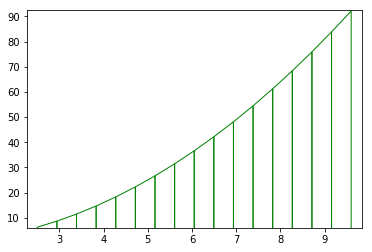

In [9]:
h = (ls-li)/nx
def integralTrapecio(f, a, b, n):
    suma = 0
    for i in range(1, n+1):
        suma = suma + h*((fx.subs(x,a+(i-1)*h) + fx.subs(x,a+(i)*h))/2)
    return suma

I = integralTrapecio(fx, li, ls, nx)    

display(Math("I = \int_{"+latex(li)+"}^{"+latex(ls)+"} "+latex(fx)+"\; dx = "+latex(I)))

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)

lista = []

for i in range(0, nx+1):
    lista.append(fx.subs(x, li + i*h))

for i in range(0,nx):
    
    points = [[li+i*h, 0], [li+i*h, fx.subs(x,li+i*h)], [li+(i+1)*h, fx.subs(x,li+(i+1)*h)], [li+(i+1)*h, 0], [li+i*h, 0]] #the points to trace the edges.

    polygon= plt.Polygon(points,  fill=None, edgecolor='g')

    ax2.add_patch(polygon)

max_var = max(lista)
min_var = min(lista)

eps = (ls-li)/30

axes = plt.gca()
display(Math('Representación\; gráfica'))
axes.set_xlim([li-eps,ls+eps])
axes.set_ylim([float(min_var)-eps, float(max_var)+eps])
plt.show()
